In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier 
from xgboost import XGBClassifier


from sklearn.model_selection import KFold ,cross_val_score ,train_test_split


from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("Testing.csv")
test = pd.read_csv("Training.csv")

In [3]:
train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


In [4]:
test

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [5]:
train.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [6]:
test.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [7]:
train.columns


Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [8]:
test.columns


Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [9]:
train.shape


(42, 133)

In [10]:
test.shape


(4920, 134)

In [11]:
print("describtion of train data (Numerical)")
train.describe().style.background_gradient(cmap='Reds')

describtion of train data (Numerical)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.166667,0.190476,0.023810,0.047619,0.023810,0.166667,0.142857,0.047619,0.047619,0.023810,0.023810,0.404762,0.047619,0.023810,0.404762,0.023810,0.023810,0.023810,0.047619,0.095238,0.047619,0.095238,0.023810,0.023810,0.119048,0.285714,0.023810,0.095238,0.142857,0.023810,0.047619,0.238095,0.190476,0.119048,0.238095,0.238095,0.023810,0.047619,0.047619,0.214286,0.119048,0.071429,0.023810,0.166667,0.023810,0.000000,0.023810,0.071429,0.142857,0.071429,0.071429,0.023810,0.023810,0.023810,0.023810,0.023810,0.142857,0.023810,0.047619,0.023810,0.023810,0.023810,0.023810,0.047619,0.071429,0.023810,0.023810,0.047619,0.023810,0

In [12]:
print("describtion of test data (Categoty)")
train.describe(include="object").style.background_gradient(cmap='Blues')

describtion of test data (Categoty)


,prognosis
count,42
unique,41
top,Fungal infection
freq,2


In [13]:
print("describtion of test data (Numerical)")
test.describe().style.background_gradient(cmap='Blues')

describtion of test data (Numerical)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,0.021951,0.389024,0.043902,0.021951,0.392683,0.023171,0.023171,0.023171,0.046341,0.092683,0.046341,0.092683,0.021951,0.023171,0.114634,0.276829,0.021951,0.091463,0.137805,0.021951,0.045122,0.230488,0.185366,0.115854,0.232927,0.234146,0.024390,0.0

In [14]:
print("describtion of test data (Categoty)")
test.describe(include="object").style.background_gradient(cmap='Blues')

describtion of test data (Categoty)


,prognosis
count,4920
unique,41
top,Fungal infection
freq,120


In [15]:
train.info(max_cols=134)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 133 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    itching                         42 non-null     int64 
 1    skin_rash                       42 non-null     int64 
 2    nodal_skin_eruptions            42 non-null     int64 
 3    continuous_sneezing             42 non-null     int64 
 4    shivering                       42 non-null     int64 
 5    chills                          42 non-null     int64 
 6    joint_pain                      42 non-null     int64 
 7    stomach_pain                    42 non-null     int64 
 8    acidity                         42 non-null     int64 
 9    ulcers_on_tongue                42 non-null     int64 
 10   muscle_wasting                  42 non-null     int64 
 11   vomiting                        42 non-null     int64 
 12   burning_micturition             42 n

In [16]:
test.info(134)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 134 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    itching                         int64  
 1    skin_rash                       int64  
 2    nodal_skin_eruptions            int64  
 3    continuous_sneezing             int64  
 4    shivering                       int64  
 5    chills                          int64  
 6    joint_pain                      int64  
 7    stomach_pain                    int64  
 8    acidity                         int64  
 9    ulcers_on_tongue                int64  
 10   muscle_wasting                  int64  
 11   vomiting                        int64  
 12   burning_micturition             int64  
 13   spotting_ urination             int64  
 14   fatigue                         int64  
 15   weight_gain                     int64  
 16   anxiety                         int64  
 17   cold_hands_a

In [17]:
train["fluid_overload"].unique()


array([0], dtype=int64)

In [18]:
train['prognosis'].unique()


array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [19]:
train['prognosis'].nunique()


41

In [20]:
for col in train:
    print(f"{col} has {train[col].unique()}")

itching has [1 0]
skin_rash has [1 0]
nodal_skin_eruptions has [1 0]
continuous_sneezing has [0 1]
shivering has [0 1]
chills has [0 1]
joint_pain has [0 1]
stomach_pain has [0 1]
acidity has [0 1]
ulcers_on_tongue has [0 1]
muscle_wasting has [0 1]
vomiting has [0 1]
burning_micturition has [0 1]
spotting_ urination has [0 1]
fatigue has [0 1]
weight_gain has [0 1]
anxiety has [0 1]
cold_hands_and_feets has [0 1]
mood_swings has [0 1]
weight_loss has [0 1]
restlessness has [0 1]
lethargy has [0 1]
patches_in_throat has [0 1]
irregular_sugar_level has [0 1]
cough has [0 1]
high_fever has [0 1]
sunken_eyes has [0 1]
breathlessness has [0 1]
sweating has [0 1]
dehydration has [0 1]
indigestion has [0 1]
headache has [0 1]
yellowish_skin has [0 1]
dark_urine has [0 1]
nausea has [0 1]
loss_of_appetite has [0 1]
pain_behind_the_eyes has [0 1]
back_pain has [0 1]
constipation has [0 1]
abdominal_pain has [0 1]
diarrhoea has [0 1]
mild_fever has [0 1]
yellow_urine has [0 1]
yellowing_of_eyes

In [21]:
train = train.drop("Unnamed: 133", axis=1, errors='ignore')

In [22]:
train.columns


Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

<Axes: xlabel='chills', ylabel='count'>

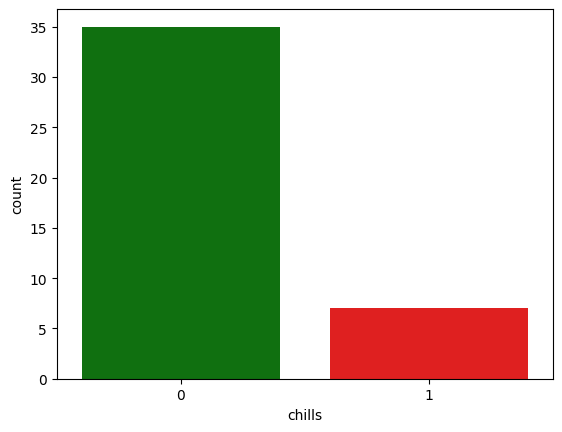

In [23]:
sns.countplot(x='chills', data=train, palette=(['g','r']))

<Axes: xlabel='inflammatory_nails', ylabel='count'>

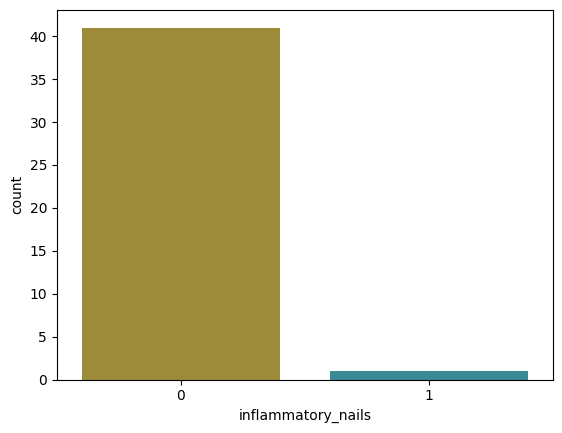

In [24]:
sns.countplot(x='inflammatory_nails', data=train, palette=(["#ad9529", "#2b95a6"]))

In [25]:
groupping=train.groupby("prognosis")[["continuous_sneezing", "yellow_crust_ooze", "stomach_pain", "shivering"]].nunique().sort_values(by="yellow_crust_ooze", ascending=True)
groupping

,continuous_sneezing,yellow_crust_ooze,stomach_pain,shivering
prognosis,,,,
(vertigo) Paroymsal Positional Vertigo,1,1,1,1
Hepatitis E,1,1,1,1
Hypertension,1,1,1,1
Hyperthyroidism,1,1,1,1
Hypoglycemia,1,1,1,1
Hypothyroidism,1,1,1,1
Impetigo,1,1,1,1
Jaundice,1,1,1,1
Malaria,1,1,1,1


In [26]:
le = LabelEncoder()
train["prognosis"] = le.fit_transform(train["prognosis"])

In [27]:
data_train = train.drop("prognosis",axis=1)
target = train["prognosis"]
data_train.shape, target.shape

((42, 132), (42,))

In [28]:
k_fold = KFold(n_splits= 5, shuffle=True, random_state=42)

In [29]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'

score = cross_val_score(clf, data_train, target, cv=k_fold, n_jobs=-1, scoring=scoring)

print(score)

[0. 0. 0. 0. 0.]


In [30]:
round(np.mean(score)*100, 2)

0.0

In [31]:
clf2 = DecisionTreeClassifier(criterion = "log_loss" ,max_depth=9 ,random_state= 42)
scoring = 'accuracy'
score = cross_val_score(clf2, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.    0.    0.    0.125 0.   ]


In [32]:
round(np.mean(score)*100, 2)


2.5

In [33]:
clf3 = RandomForestClassifier(n_estimators=80 , criterion = "entropy" , max_depth= 2 ,random_state= 0)
scoring = 'accuracy'
score = cross_val_score(clf3, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.    0.    0.125 0.    0.   ]


In [34]:
round(np.mean(score)*100, 2)

2.5

In [35]:
clf4 = GaussianNB(var_smoothing=100)
scoring = 'accuracy'
score = cross_val_score(clf4, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.    0.    0.    0.125 0.   ]


In [36]:
round(np.mean(score)*100, 2)

2.5

In [37]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.03, random_state=42, max_features=3, max_depth=2)
scoring = 'accuracy'
score = cross_val_score(gbc, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0. 0. 0. 0. 0.]


In [38]:
round(np.mean(score)*100,2)

0.0

In [39]:
clf5 = SVC( kernel="rbf", random_state= 0 , probability=True)
scoring = 'accuracy'
score = cross_val_score(clf5, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.    0.    0.    0.125 0.   ]


In [40]:
round(np.mean(score)*100,2)

2.5

In [41]:
clf6 = AdaBoostClassifier(n_estimators=100, learning_rate=0.02)
scoring = 'accuracy'
score = cross_val_score(clf6, data_train, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score)

[0. 0. 0. 0. 0.]


In [42]:
round(np.mean(score)*100,2)

0.0

In [44]:
clf7 = XGBClassifier(max_depth = 2 , learning_rate = 0.02 ,n_estimators= 50, random_state=42 , max_features= 3 )
scoring = 'accuracy'
score = cross_val_score(clf7, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31], got [ 0  1  2  3  4  5  6  7  8  9 11 12 13 15 16 19 20 21 22 23 24 25 26 27
 28 29 30 31 33 34 37 38]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31], got [ 2  3  4  5  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24 26 27 28 30 31
 32 33 35 36 37 38 39 40]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33], got [ 0  1  2  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 28
 29 31 32 34 35 36 37 38 39 40]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33], got [ 0  1  3  4  5  6  7  8 10 11 12 13 14 15 17 18 19 21 23 25 26 27 28 29
 30 32 33 34 35 36 37 38 39 40]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32], got [ 0  1  2  3  4  5  6  7  8  9 10 11 14 15 16 17 18 20 22 24 25 26 27 29
 30 31 32 33 34 35 36 39 40]


In [45]:
round(np.mean(score)*100, 2)

0.0

In [45]:
clf8 = AdaBoostClassifier(n_estimators=100, learning_rate=0.02)
clf9 = GaussianNB(var_smoothing=100)
clf10 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.03, random_state=42, max_features=3, max_depth=2)
clf11 = DecisionTreeClassifier(criterion = "log_loss" ,max_depth=9 ,random_state= 42)

In [46]:
v_clf55 = VotingClassifier(estimators=[("AdaBoostClassifier" , clf8) , ('GaussianNB' , clf9) ,
                                     ("GradientBoostingClassifier" , clf10) ,("DecisionTreeClassifier" , clf11)] , voting = "hard")

scoring = 'accuracy'
score = cross_val_score(v_clf55, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.    0.    0.    0.125 0.   ]


In [47]:
round(np.mean(score)*100, 2)

2.5

In [48]:
x = train.drop("prognosis",axis=1)
y = train['prognosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=42)

In [49]:
LogR = LogisticRegression(random_state = 42)

In [50]:
LogR.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [51]:
y_pred = LogR.predict(x_test)

In [52]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
3.8461538461538463


In [53]:
print(LogR.score(x_test , y_test)*100)

3.8461538461538463


In [54]:
knn = KNeighborsClassifier(n_neighbors = 4 )

In [55]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [56]:
y_pred = knn.predict(x_test)

In [57]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [58]:
print(knn.score(x_test , y_test)*100)

0.0


In [59]:
svm1 = SVC(kernel = 'poly', random_state = 0)
svm1.fit(x_train, y_train)

SVC(kernel='poly', random_state=0)

In [60]:
y_pred = svm1.predict(x_test)

In [61]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 

In [62]:
print(svm1.score(x_test , y_test)*100)

0.0


In [63]:
Dtc = DecisionTreeClassifier(criterion = "log_loss" ,max_depth=9 ,random_state= 42)
Dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=9, random_state=42)

In [64]:
y_pred = Dtc.predict(x_test)

In [65]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
3.8461538461538463


In [66]:
print(Dtc.score(x_test , y_test)*100)

3.8461538461538463


In [67]:
Rf = RandomForestClassifier(n_estimators=80 , criterion = "entropy" , max_depth= 2 ,random_state= 0)
Rf.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=80,
                       random_state=0)

In [68]:
y_pred = Rf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
3.8461538461538463


In [69]:
print(Rf.score(x_test , y_test)*100)

3.8461538461538463


In [70]:
xgb = XGBClassifier(max_depth = 2 , learning_rate = 0.02 ,n_estimators= 50, random_state=42 , max_features= 3 )
xgb.fit(x_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15], got [ 2  9 12 13 15 16 19 20 21 22 23 24 28 31 37 38]

In [71]:
y_pred = xgb.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

NotFittedError: need to call fit or load_model beforehand

In [ ]:
print(xgb.score(x_test , y_test)*100)

In [72]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.03, random_state=42, max_features=3, max_depth=2)
gbc.fit(x_train, y_train)


GradientBoostingClassifier(learning_rate=0.03, max_depth=2, max_features=3,
                           n_estimators=50, random_state=42)

In [73]:
y_pred = gbc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
0.0


In [74]:
print(gbc.score(x_test , y_test)*100)

0.0


In [75]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.02)
ada.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=100)

In [76]:
y_pred = ada.predict(x_test)

In [77]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0.0


In [78]:
print(ada.score(x_test , y_test)*100)

0.0


In [79]:
clf1 = DecisionTreeClassifier(criterion = "log_loss" ,max_depth=9 ,random_state= 42)
clf2 = XGBClassifier(max_depth = 2 , learning_rate = 0.02 ,n_estimators= 50, random_state=42 , max_features= 3 )
clf3 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.03, random_state=42, max_features=3, max_depth=2)
clf4 = AdaBoostClassifier(n_estimators=100, learning_rate=0.02)

In [80]:
v_clf = VotingClassifier(estimators=[("DecisionTreeClassifier" , clf1) , ('XGBClassifier' , clf2) ,
                                     ("GradientBoostingClassifier" , clf3) ,("AdaBoostClassifier" , clf4)] , voting = "soft")

In [81]:
v_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('DecisionTreeClassifier',
                              DecisionTreeClassifier(criterion='log_loss',
                                                     max_depth=9,
                                                     random_state=42)),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=Non...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('GradientBoostingClassifier',
                              GradientBoostingClassifier(learning_rate=0.03,
                                                         max_depth=2,
                                                         max_features=3,
                                                         n_estimators=50,
                                                         random_state=42)),
                             ('AdaBoostClassifier',
                              AdaBoostClassifier(learning_rate=0.02,
                                                 n_estimators=100))],
                 voting='soft')

In [82]:
y_pred = v_clf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
3.8461538461538463


In [83]:
v_clf.score(x_test , y_test)

0.038461538461538464

In [86]:
target = le.inverse_transform(target)
target

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo',
       'Fungal infection'], dtype=object)

In [85]:
testing = VotingClassifier(estimators=[("DecisionTreeClassifier" , clf1) , ('XGBClassifier' , clf2) ,
                             ("GradientBoostingClassifier" , clf3) ,("AdaBoostClassifier" , clf4)] , voting = "soft")

model = testing.fit(data_train, target)

test_data = test.drop("prognosis", axis=1).copy()
prediction = testing.predict(test_data)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Unnamed: 133


In [88]:
prediction

NameError: name 'prediction' is not defined

In [89]:
submission = test.join(pd.DataFrame(model.predict(test_data),columns=["predicted"]))[["prognosis","predicted"]]
submission.to_csv('subm1.csv', index=False)

NameError: name 'model' is not defined

In [90]:
submission

NameError: name 'submission' is not defined

In [91]:
import numpy as np
import pandas as pd
import joblib
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

# Load datasets
dataset_path_train = "Training.csv"
dataset_path_test = "Testing.csv"

train = pd.read_csv(dataset_path_train)
test = pd.read_csv(dataset_path_test)

# Remove any unnamed columns
train = train.loc[:, ~train.columns.str.contains('^Unnamed')]
test = test.loc[:, ~test.columns.str.contains('^Unnamed')]

# Convert categorical columns to numeric
for col in train.columns:
    if train[col].dtype == 'object':
        train[col] = pd.factorize(train[col])[0]
        test[col] = pd.factorize(test[col])[0]

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
train_array = imputer.fit_transform(train)
test_array = imputer.transform(test)

train = pd.DataFrame(train_array, columns=train.columns)
test = pd.DataFrame(test_array, columns=test.columns)

# Encode target labels
le = LabelEncoder()
train['prognosis'] = le.fit_transform(train['prognosis'])

# Split features and target
data_train = train.drop('prognosis', axis=1)
target = train['prognosis']

test_data = test.drop('prognosis', axis=1)
test_labels = le.transform(test['prognosis'])  # Ensure test labels match training encoding

# Define models
models = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'XGB': XGBClassifier(max_depth=2, learning_rate=0.02, n_estimators=50, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=50, learning_rate=0.02, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42)
}

# Evaluate models
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_accuracies = {}

for name, model in models.items():
    scores = cross_val_score(model, data_train, target, cv=skf, scoring='accuracy', n_jobs=-1)
    mean_accuracy = np.mean(scores)
    model_accuracies[name] = mean_accuracy
    print(f'{name} Cross-validation scores: {scores}')
    print(f'{name} Mean Accuracy: {mean_accuracy:.4f}')

# Select the best model
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model = models[best_model_name]
print(f'Best model selected: {best_model_name} with accuracy {model_accuracies[best_model_name]:.4f}')

# Train the best model
best_model.fit(data_train, target)

# Save the best model
joblib.dump(best_model, 'best_model.pkl')
print(f'Best model saved as best_model.pkl')

# Predict using the best model
predictions = best_model.predict(test_data)
accuracy = accuracy_score(test_labels, predictions)
print(f'Test Accuracy of Best Model ({best_model_name}): {accuracy:.4f}')

# Save predictions
test['predicted_prognosis'] = le.inverse_transform(predictions)
test[['prognosis', 'predicted_prognosis']].to_csv('predictions.csv', index=False)
print('Predictions saved to predictions.csv')


DecisionTree Cross-validation scores: [1. 1. 1. 1. 1.]
DecisionTree Mean Accuracy: 1.0000
XGB Cross-validation scores: [0.9898374  0.99898374 0.99898374 0.99695122 0.99796748]
XGB Mean Accuracy: 0.9965
GradientBoosting Cross-validation scores: [1. 1. 1. 1. 1.]
GradientBoosting Mean Accuracy: 1.0000
AdaBoost Cross-validation scores: [0.26829268 0.26829268 0.26829268 0.26829268 0.26829268]
AdaBoost Mean Accuracy: 0.2683
Best model selected: DecisionTree with accuracy 1.0000
Best model saved as best_model.pkl
Test Accuracy of Best Model (DecisionTree): 0.9762
Predictions saved to predictions.csv


In [2]:
import numpy as np
import pandas as pd
import joblib
from sklearn.impute import SimpleImputer

# Load the saved model
model = joblib.load('best_model.pkl')

# Load the label encoder used during training
train = pd.read_csv("Training.csv")  # Load training data
train = train.loc[:, ~train.columns.str.contains('^Unnamed')]  # Remove unnamed columns

# Recreate LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['prognosis'] = le.fit_transform(train['prognosis'])  # Fit with training labels

# Get the list of symptoms (features used for training)
feature_columns = train.drop(columns=['prognosis']).columns


In [3]:
def predict_disease(symptoms_list):
    # Convert input symptoms into a feature vector
    user_input = np.zeros(len(feature_columns))  # Initialize all features as 0
    
    for symptom in symptoms_list:
        if symptom in feature_columns:
            user_input[list(feature_columns).index(symptom)] = 1  # Mark symptom as present

    # Reshape input for prediction
    user_input = user_input.reshape(1, -1)

    # Predict the prognosis
    predicted_label = model.predict(user_input)[0]
    predicted_disease = le.inverse_transform([predicted_label])[0]

    return predicted_disease


In [5]:
# Example input from a user (user selects symptoms they have)
user_symptoms = ["continuous_sneezing", "shivering,chills", "joint_pain","cold_hands_and_feets"]  # Example symptoms

predicted_disease = predict_disease(user_symptoms)
print(f"Predicted Disease: {predicted_disease}")


Predicted Disease: Pneumonia


c:\Users\manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
